In [86]:
# Import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from statistics import median

In [87]:
import numpy as np
import pandas as pd

In [88]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [89]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [90]:
# Set up link for engine
engine = create_engine("sqlite:///hawaii.sqlite")

In [91]:
# Reflect an existing database into a new model
Base = automap_base()
# Reflect the tables
Base.prepare(engine, reflect=True)

In [92]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [93]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [94]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [95]:
# Check for the last date
last_date = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).first() 
last_date

('2017-08-23', 0.0)

In [96]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results and sort results by date
prcp_date = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= '2016-08-23').\
            order_by(Measurement.date.asc()).all()

prcp_date

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [97]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_date_df = pd.DataFrame(prcp_date, columns=['Date', 'Percipitation'])
prcp_date_df.set_index('Date', inplace=True)

# Check DF
prcp_date_df.head()

,Percipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


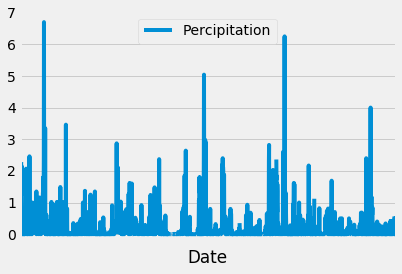

In [98]:
# Plot percipitation line chart
prcp_date_df.plot.line()
plt.xticks([])


# Save and plot the percipitation line chart
plt.savefig('percipitation_chart.png')
plt.show()

# Exploratory Climate Analysis

In [99]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_date_df.describe()

,Percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [100]:
# Design a query to show how many stations are available in this dataset?
total_stations = session.query(func.count(Station.station)).all()

total_stations

[(9)]

In [101]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, (func.count(Measurement.station))).\
                       group_by(Measurement.station).\
                       order_by(func.count(Measurement.station).desc()).all()

most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [102]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
measurement_statistics = [func.min(Measurement.tobs), 
                         func.max(Measurement.tobs), 
                         func.avg(Measurement.tobs)]

most_active_station_measurements = session.query(*measurement_statistics).\
                                   filter(Measurement.station == 'USC00519281').all()

# Check query
most_active_station_measurements

[(54.0, 85.0, 71.66378066378067)]

In [103]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highes_actvity_station = session.query(Measurement.tobs).\
                         filter(Measurement.date >= '2016-08-23').\
                         filter(Measurement.station == 'USC00519281').all()

# Check query
highes_actvity_station

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

In [104]:
# Store results into a DF
highes_actvity_station_df = pd.DataFrame(highes_actvity_station, columns=['TOBS'])

# Check DF
highes_actvity_station_df.head()

,TOBS
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


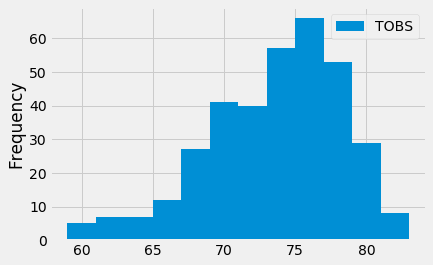

In [105]:
# Plot the TOBS histogram
temp_hist = highes_actvity_station_df.plot.hist(bins=12)

# Plot and save fig
plt.savefig('TOBS_histogram.png')
plt.show()

In [106]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
calc_temps('2016-08-05', '2016-08-15')

[(71.0, 78.49295774647888, 83.0)]

In [107]:
# Declare start and end dates for trip
srt_date = '2016-08-05'
ed_date = '2016-08-15'


# Unravel reselts from the cal_temps function
trip_temp_list = np.ravel(list(calc_temps('2016-08-05', '2016-08-15')))


# Assign results to variables for the error bar chart 
trip_max_temp = max(trip_temp_list)

trip_min_temp = min(trip_temp_list)

y = median(trip_temp_list)


# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
error = (trip_max_temp - trip_min_temp)


# Check variables
print(trip_max_temp, y, trip_min_temp)

83.0 78.49295774647888 71.0


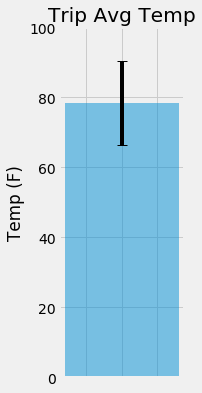

In [114]:
# Build the errob bar plot
x = 1
fig, ax = plt.subplots(figsize = (2, 6))
ax.bar(x, y, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=5)

###  Quick note....  For some reason, you cant set_xlim without losing your error bar...
ax.set_ylabel('Temp (F)')
ax.set_ylim([0, 100])
ax.set_xticklabels([])

# Set the title and grid
ax.set_title('Trip Avg Temp')
ax.yaxis.grid(True)


# Save and plot the chart
plt.savefig('trip_temp_bar_plot_with_error_bars.png')
plt.show()

In [115]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
# Previous years dates for trip

py_srt_date = '2015-08-05'
py_ed_date = '2015-08-15'


select = [Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation, Measurement.prcp]
         
trip_weather_details = session.query(*select).filter(Measurement.station == Station.station).\
               filter(Measurement.date >= py_srt_date).filter(Measurement.date <= py_ed_date).\
               group_by(Measurement.station).\
               order_by(Measurement.prcp.desc()).all()

trip_weather_details

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.59),
 ('USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9,
  0.1),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.1),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.02),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  0.02),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  None),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)]

## Optional Challenge Assignment

In [110]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("08-05")

[(69.0, 76.14814814814815, 82.0)]

In [111]:

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

# Trip Start date is 2016-08-05', and end date '2016-08-05'

# Loop to create list out of the date ranges for your trip
i = 5
normals = []

while i <= 15:
    
    
    if i < 10:
        
        new_date = f"08-0{i}"
        new_date_normals = daily_normals(new_date)
        normals.append(*new_date_normals)
        i += 1
        
    else:
        
        new_date = f"08-{i}"
        new_date_normals = daily_normals(new_date)
        normals.append(*new_date_normals)
        i += 1
    
    
# Check list    
normals

[(69.0, 76.14814814814815, 82.0),
 (67.0, 76.25, 83.0),
 (71.0, 77.15686274509804, 83.0),
 (68.0, 76.5576923076923, 83.0),
 (69.0, 75.98039215686275, 81.0),
 (65.0, 76.42, 83.0),
 (67.0, 75.98113207547169, 82.0),
 (67.0, 76.52727272727273, 83.0),
 (71.0, 76.98245614035088, 84.0),
 (71.0, 76.77777777777777, 82.0),
 (69.0, 76.47169811320755, 83.0)]

In [112]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(normals, columns = ["T_Min", "T_Avg", "T_Max"])

normals_df

,T_Min,T_Avg,T_Max
0,69.0,76.148148,82.0
1,67.0,76.250000,83.0
2,71.0,77.156863,83.0
3,68.0,76.557692,83.0
4,69.0,75.980392,81.0
5,65.0,76.420000,83.0
6,67.0,75.981132,82.0
7,67.0,76.527273,83.0
8,71.0,76.982456,84.0
9,71.0,76.777778,82.0


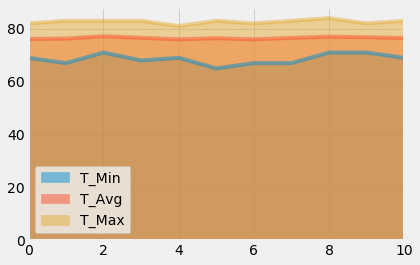

<Figure size 432x288 with 0 Axes>

In [116]:
# Plot the daily normals as area plot with `stacked=False`
ax = normals_df.plot.area(stacked = False)

# Plot chart and save
plt.show()
plt.savefig('trip_area_chart.png')